In [14]:
import numpy as np
import torch
import random
%matplotlib inline
import matplotlib.pyplot as plt
import torch.nn as nn

In [2]:
T=1000
time=torch.arange(1,T+1,dtype=torch.float32)
x=torch.sin(0.01*time)+torch.normal(0,0.2,(T,))

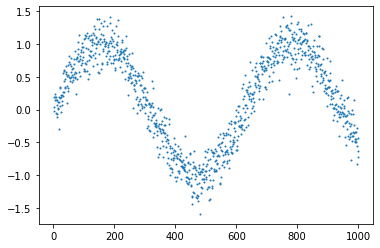

In [7]:
plt.scatter(time.numpy(),[x.numpy()],1)

In [10]:
tau=4
features=torch.zeros((T-tau,tau))
for i in range(tau):
    features[:,i]=x[i:T-tau+i]
labels=x[tau:].reshape((-1,1))

batch_size,n_train=16,600


In [11]:
def data_iter(batch_size,features,labels):
    num_examples=len(features)
    indices=list(range(num_examples))
    random.shuffle(indices)
    for i in range(0,num_examples,batch_size):
        batch_indices=torch.tensor(indices[i:min(i+batch_size,num_examples)])
        yield features[batch_indices],labels[batch_indices]

In [12]:
train_iter=data_iter(batch_size,features,labels)

In [19]:
def init_weight(m):
    if type(m)==nn.Linear:
        nn.init.xavier_uniform_(m.weight)

def get_net():
    net=nn.Sequential(nn.Linear(4,10),nn.ReLU(),nn.Linear(10,1))
    net.apply(init_weight)
    return net

loss=nn.MSELoss()

In [20]:
def train(net,train_iter,loss,epochs,lr):
    trainer=torch.optim.Adam(net.parameters(),lr)
    for epoch in range(epochs):
        for X,y in train_iter:
            trainer.zero_grad()
            l=loss(net(X),y)
            l.backward()
            trainer.step()
        print(f'epoch {epoch+1}, loss {l.sum()}')
net=get_net()

In [21]:
train(net,train_iter,loss,5,0.01)

epoch 1, loss 0.03664383664727211
epoch 2, loss 0.03664383664727211
epoch 3, loss 0.03664383664727211
epoch 4, loss 0.03664383664727211
epoch 5, loss 0.03664383664727211
